In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None) 

df = pd.read_csv('Loan.csv', sep=',')

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [16]:
df.isna().sum().sum()

0

In [17]:
df.groupby('LoanApproved')['BankruptcyHistory'].value_counts()

LoanApproved  BankruptcyHistory
0             0                    14288
              1                      932
1             0                     4664
              1                      116
Name: count, dtype: int64

In [18]:
pd.set_option('display.max_rows',None) 

correlation_matrix = df.select_dtypes(include=['number']).corr()
maxi = []
mini = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i, correlation_matrix.shape[1]):  
        value = correlation_matrix.iloc[i, j]
        if 0 < value < 1:  
            maxi.append((correlation_matrix.index[i], correlation_matrix.columns[j], value))
        elif value <= 0:
            mini.append((correlation_matrix.index[i], correlation_matrix.columns[j], value))
maxi.sort(key=lambda x: x[2], reverse=True)
mini.sort(key=lambda x: x[2], reverse=False)
maxi = pd.DataFrame(maxi)
mini = pd.DataFrame(mini)

In [19]:
maxi[maxi[1] == 'LoanApproved']

,0,1,2
5,MonthlyIncome,LoanApproved,0.604101
6,AnnualIncome,LoanApproved,0.597900
22,NetWorth,LoanApproved,0.187892
23,TotalAssets,LoanApproved,0.184011
28,CreditScore,LoanApproved,0.142000
29,Age,LoanApproved,0.141029
30,Experience,LoanApproved,0.140755
38,LengthOfCreditHistory,LoanApproved,0.105949
44,PaymentHistory,LoanApproved,0.030804
118,JobTenure,LoanApproved,0.004997


In [20]:
mini[mini[1] == 'LoanApproved']

,0,1,2
7,TotalDebtToIncomeRatio,LoanApproved,-0.410399
10,InterestRate,LoanApproved,-0.301646
12,BaseInterestRate,LoanApproved,-0.247263
15,LoanAmount,LoanApproved,-0.239496
20,MonthlyLoanPayment,LoanApproved,-0.184272
28,LoanDuration,LoanApproved,-0.094558
31,BankruptcyHistory,LoanApproved,-0.070751
32,MonthlyDebtPayments,LoanApproved,-0.070415
33,PreviousLoanDefaults,LoanApproved,-0.065343
37,TotalLiabilities,LoanApproved,-0.029434


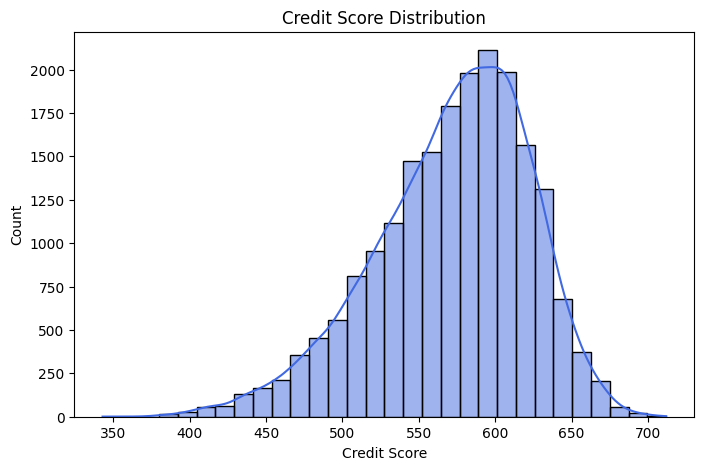

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='royalblue')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()


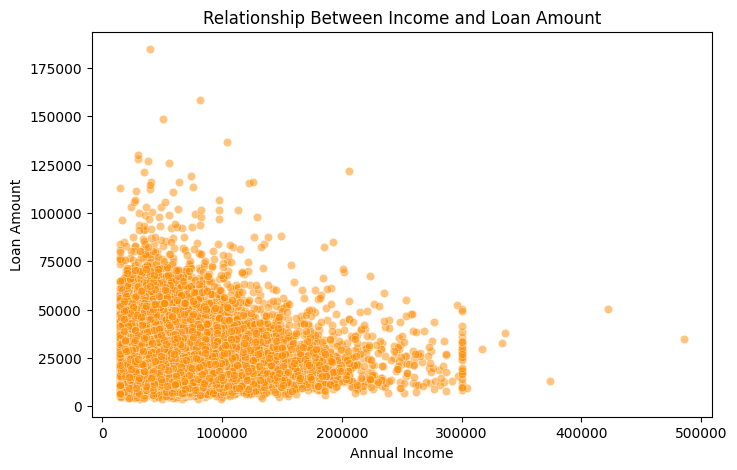

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AnnualIncome', y='LoanAmount', alpha=0.5, color='darkorange')
plt.title('Relationship Between Income and Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()


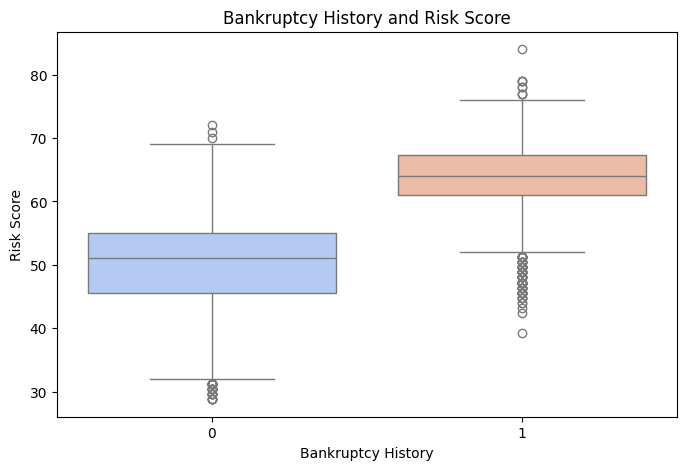

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='BankruptcyHistory', y='RiskScore', palette='coolwarm')
plt.title('Bankruptcy History and Risk Score')
plt.xlabel('Bankruptcy History')
plt.ylabel('Risk Score')
plt.show()


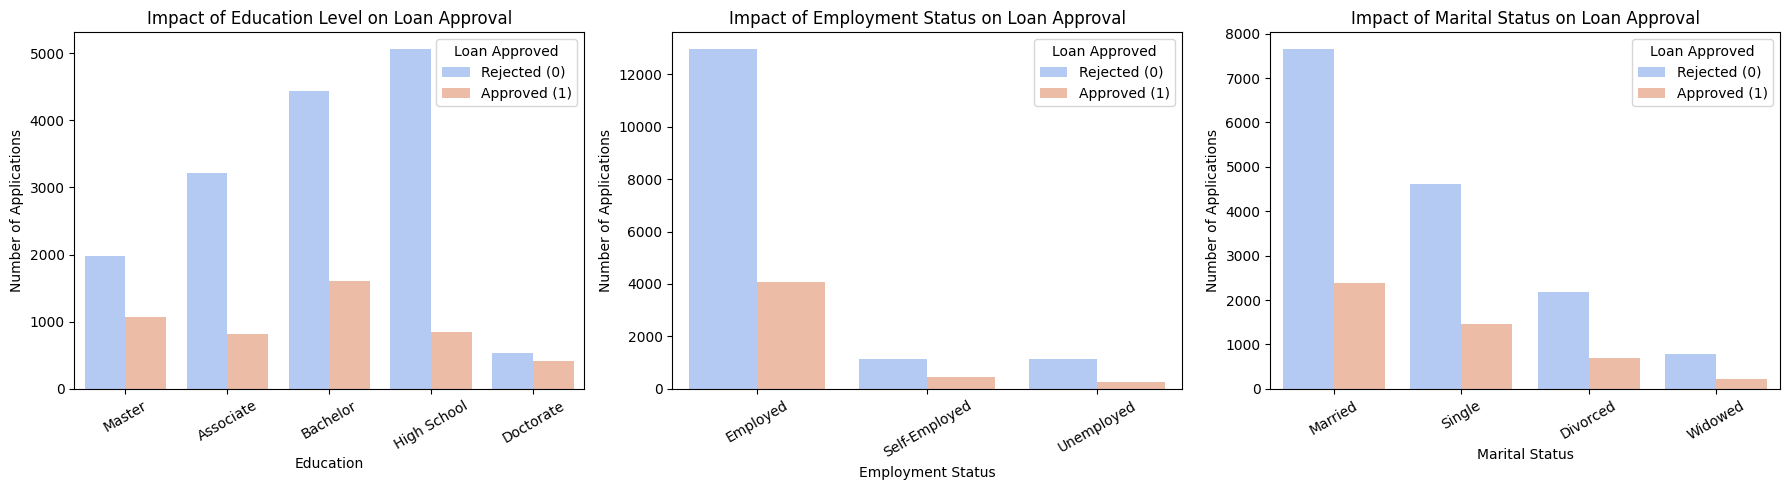

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row and 3 columns

# Define subplots
sns.countplot(data=df, x='EducationLevel', hue='LoanApproved', palette='coolwarm', ax=axes[0])
axes[0].set_title('Impact of Education Level on Loan Approval')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Number of Applications')
axes[0].tick_params(axis='x', rotation=30)
axes[0].legend(title='Loan Approved', labels=['Rejected (0)', 'Approved (1)'])

sns.countplot(data=df, x='EmploymentStatus', hue='LoanApproved', palette='coolwarm', ax=axes[1])
axes[1].set_title('Impact of Employment Status on Loan Approval')
axes[1].set_xlabel('Employment Status')
axes[1].set_ylabel('Number of Applications')
axes[1].tick_params(axis='x', rotation=30)
axes[1].legend(title='Loan Approved', labels=['Rejected (0)', 'Approved (1)'])

sns.countplot(data=df, x='MaritalStatus', hue='LoanApproved', palette='coolwarm', ax=axes[2])
axes[2].set_title('Impact of Marital Status on Loan Approval')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Number of Applications')
axes[2].tick_params(axis='x', rotation=30)
axes[2].legend(title='Loan Approved', labels=['Rejected (0)', 'Approved (1)'])

# Show plots
plt.tight_layout()
plt.show()


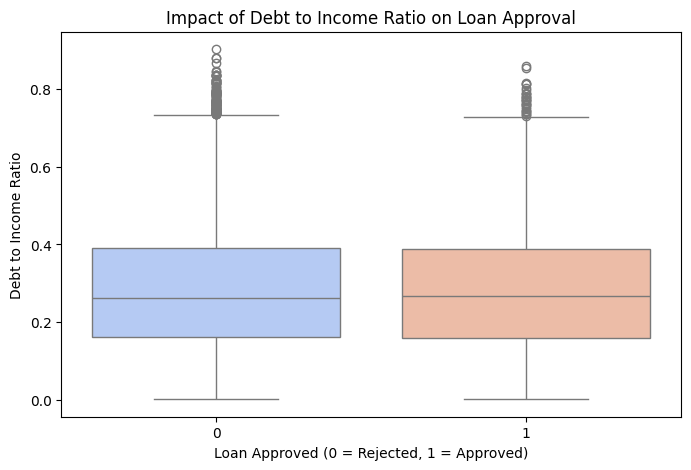

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='LoanApproved', y='DebtToIncomeRatio', palette='coolwarm')
plt.title('Impact of Debt to Income Ratio on Loan Approval')
plt.xlabel('Loan Approved (0 = Rejected, 1 = Approved)')
plt.ylabel('Debt to Income Ratio')
plt.show()


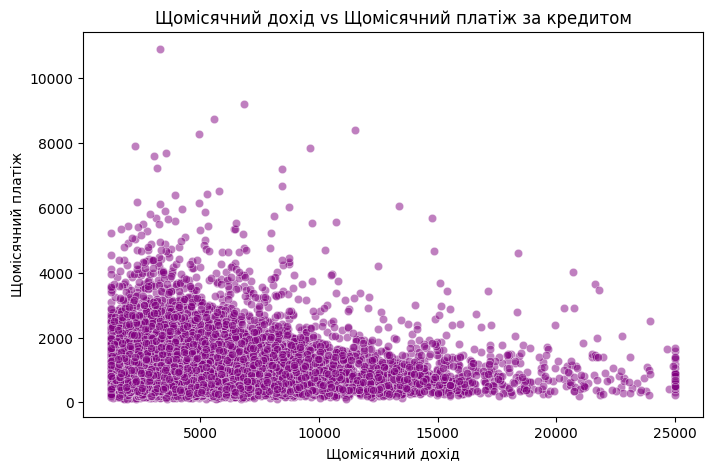

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='MonthlyIncome', y='MonthlyLoanPayment', alpha=0.5, color='purple')
plt.title('Щомісячний дохід vs Щомісячний платіж за кредитом')
plt.xlabel('Щомісячний дохід')
plt.ylabel('Щомісячний платіж')
plt.show()


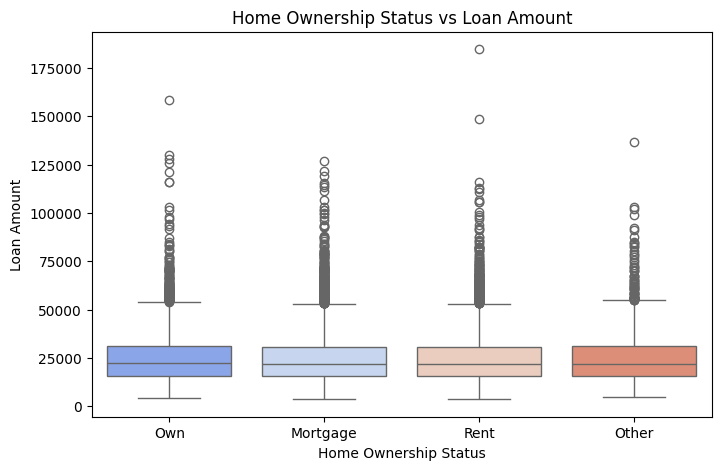

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='HomeOwnershipStatus', y='LoanAmount', palette='coolwarm')
plt.title('Home Ownership Status vs Loan Amount')
plt.xlabel('Home Ownership Status')
plt.ylabel('Loan Amount')
plt.show()


In [ ]:
prestige_mapping = {
    'High School': 1,
    'Associate' : 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate':5
}


df['EducationLevel'] = df['EducationLevel'].map(prestige_mapping)
df = pd.get_dummies(df, columns=['LoanPurpose'], drop_first=True)
df = df.drop(columns = [  'EmploymentStatus','Age', 'DebtToIncomeRatio', 'CheckingAccountBalance', 'SavingsAccountBalance', 'NumberOfDependents', 'UtilityBillsPaymentHistory', 'JobTenure', 'ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus' ])

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns
import joblib, pickle
scaler_minmax = MinMaxScaler()
df[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

In [ ]:
X = df.drop(columns=['LoanApproved', 'RiskScore'])
y_class = df['LoanApproved']
y_reg = df['RiskScore']

In [ ]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [ ]:
result = {
    'Model' : [],
    'Score_train': [],
    'Score_test': [],
    'MSE': [],
    'Accuracy': []
}

In [ ]:
logistic_model = LogisticRegression(penalty= 'l2', C =100, max_iter=100, solver = 'lbfgs', fit_intercept=False)
logistic_model.fit(X_train, y_class_train)

y_pred_log = logistic_model.predict(X_test)
mse = mean_squared_error(y_class_test, y_pred_log)

result['Model'].append('Logistic Regression')
result['Score_train'].append(logistic_model.score(X_train,y_class_train))
result['Score_test'].append(logistic_model.score(X_test, y_class_test))
result['MSE'].append(mse)
result['Accuracy'].append(accuracy_score(y_class_test, y_pred_log))


print(f'Score_train: {logistic_model.score(X_train,y_class_train)}')
print(f'Score_test: {logistic_model.score(X_test, y_class_test)}')
print(f'MSE: {mse}')
print(classification_report(y_class_test, y_pred_log))


Score_train: 0.961875
Score_test: 0.95725
MSE: 0.04275
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2983
         1.0       0.93      0.90      0.91      1017

    accuracy                           0.96      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.96      0.96      0.96      4000



In [ ]:
Penalty = ['l1', 'l2',  None]
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
Solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Max_iter = [100, 500, 1000, 5000]
Fit_intercept = [True, False]


for c in C:
    for solver in Solver:
        for max_iter in Max_iter:
            for penalty in Penalty:
                for fit_intercept in Fit_intercept:
                    # Skip invalid solver-penalty combinations
                    if solver in ['newton-cg', 'lbfgs', 'sag'] and penalty not in ['l2', 'none']:
                        continue
                    if solver == 'liblinear' and penalty not in ['l1', 'l2']:
                        continue
                    if solver == 'saga' and penalty == 'none':
                        continue
                    
                    logistic_model = LogisticRegression(penalty=penalty, C=c, fit_intercept=fit_intercept, max_iter=max_iter, solver=solver)
                    logistic_model.fit(X_train, y_class_train)

                    y_pred_log = logistic_model.predict(X_test)
                    
                    result['Model'].append('Logistic Regression')
                    result['model_config'].append(f"penalty={penalty}, c ={c}, max_iter={max_iter}, solver ={solver}, fit_intercept={fit_intercept}")
                    result['train_score'].append(logistic_model.score(X_train,y_class_train))
                    result['test_score'].append(logistic_model.score(X_test, y_class_test))
                    result['f1-score'].append(accuracy_score(y_class_test, y_pred_log))

In [ ]:
pd.set_option('display.max_colwidth', None)

df_result = pd.DataFrame(result)
df_result = df_result.sort_values(by=['test_score', 'f1-score'], ascending=[False, False])
df_result

In [ ]:
tr_model = DecisionTreeClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=7)
tr_model.fit(X_train, y_class_train)

y_pred_tr = tr_model.predict(X_test)

print('Decision Tree')

print(f'Score_train: {tr_model.score(X_train,y_class_train)}')
print(f'Score_test: {tr_model.score(X_test, y_class_test)}')
mse = mean_squared_error(y_class_test, y_pred_tr)
print(classification_report(y_class_test, y_pred_tr))


result['Model'].append('Decision Tree')
result['Score_train'].append(tr_model.score(X_train,y_class_train))
result['Score_test'].append(tr_model.score(X_test, y_class_test))
result['MSE'].append(mse)
result['Accuracy'].append(accuracy_score(y_class_test, y_pred_log))

Decision Tree
Score_train: 0.9503125
Score_test: 0.90025
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2983
         1.0       0.82      0.77      0.80      1017

    accuracy                           0.90      4000
   macro avg       0.87      0.86      0.87      4000
weighted avg       0.90      0.90      0.90      4000



In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, max_features=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_class_train)

y_rf_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_class_test, y_rf_pred)

print('Random Forest')
print(f'Score_train: {rf_model.score(X_train,y_class_train)}')
print(f'Score_test: {rf_model.score(X_test, y_class_test)}')
print(f'MSE: {mse}')
print(classification_report(y_class_test, y_rf_pred))


result['Model'].append('Random Forest')
result['Score_train'].append(rf_model.score(X_train,y_class_train))
result['Score_test'].append(rf_model.score(X_test, y_class_test))
result['MSE'].append(mse)
result['Accuracy'].append(accuracy_score(y_class_test, y_rf_pred))


Random Forest
Score_train: 1.0
Score_test: 0.9315
MSE: 0.0685
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2983
         1.0       0.91      0.81      0.86      1017

    accuracy                           0.93      4000
   macro avg       0.92      0.89      0.91      4000
weighted avg       0.93      0.93      0.93      4000



In [ ]:
max_depth_values = [5, 10, 13, 16, 18, 19, 20, 24, 25]
min_samples_split_values = [6, 3, 8]
min_samples_leaf_values = [4, 5, 7]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:

            # Створення та навчання моделі
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            model.fit(X_train, y_class_train)
                                   
            y_predict = model.predict(X_test)
            
            result['Model'].append('Decision Tree')
            result['model_config'].append(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
            result['train_score'].append(model.score(X_train,y_class_train))
            result['test_score'].append(model.score(X_test, y_class_test))
            result['f1-score'].append(accuracy_score(y_class_test, y_predict))

In [ ]:
# Навчання моделі XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_class_train)

# Прогноз на тестовому наборі
y_xgb_pred = xgb_model.predict(X_test)

# Оцінка точності
mse = mean_squared_error(y_class_test, y_xgb_pred)
rmse = mse**0.5

result['Model'].append('XGBoost')
result['Score_train'].append(xgb_model.score(X_train,y_class_train))
result['Score_test'].append(xgb_model.score(X_test, y_class_test))
result['MSE'].append(mse)
result['Accuracy'].append(accuracy_score(y_class_test, y_xgb_pred))

#Score
print("Score train (XGBoost):", xgb_model.score(X_train, y_class_train))
print("Score test (XGBoost):", xgb_model.score(X_test, y_class_test))
print("MSE (XGBoost):", mse)
print("RMSE (XGBoost):", rmse)

print(classification_report(y_class_test, y_xgb_pred))


Score train (XGBoost): 0.9996875
Score test (XGBoost): 0.95025
MSE (XGBoost): 0.04975
RMSE (XGBoost): 0.22304708023195463
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2983
         1.0       0.91      0.89      0.90      1017

    accuracy                           0.95      4000
   macro avg       0.94      0.93      0.93      4000
weighted avg       0.95      0.95      0.95      4000



In [ ]:
# Базові моделі
base_models = [
    ('log_reg', LogisticRegression(penalty= 'l2', C =100, max_iter=100, solver = 'lbfgs', fit_intercept=False)),
    ('decision_tree', DecisionTreeClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=7)),
    ('random forest', RandomForestClassifier(n_estimators = 100, max_features=10, class_weight='balanced', random_state=42)),
    ('XGBoost', xgb.XGBClassifier( ))
]

# Мета-модель
meta_model = LogisticRegression()

stacking_сlf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Навчання стекінгу
stacking_сlf.fit(X_train, y_class_train)

# Прогнози на тестовому наборі
y_stack_pred = stacking_сlf.predict(X_test)

result['Model'].append('Stacking Classifier')
result['Score_train'].append(stacking_сlf.score(X_train, y_class_train))
result['Score_test'].append(stacking_сlf.score(X_test, y_class_test))
result['MSE'].append(mean_squared_error(y_class_test, y_stack_pred))
result['Accuracy'].append(accuracy_score(y_class_test, y_stack_pred))

print(classification_report(y_class_test, y_stack_pred))




              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2983
         1.0       0.93      0.89      0.91      1017

    accuracy                           0.96      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.96      0.96      0.96      4000



In [ ]:
base_model = LogisticRegression(penalty= 'l2', C =100, max_iter=100, solver = 'lbfgs', fit_intercept=False)
bagging_clf = BaggingClassifier(base_model, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_class_train)

y_bag_pred = bagging_clf.predict(X_test)

result['Model'].append('Bagging Classifier')
result['Score_train'].append(bagging_clf.score(X_train, y_class_train))
result['Score_test'].append(bagging_clf.score(X_test, y_class_test))
result['MSE'].append(mean_squared_error(y_class_test, y_bag_pred))
result['Accuracy'].append(accuracy_score(y_class_test, y_bag_pred))

print(classification_report(y_class_test, y_bag_pred))


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2983
         1.0       0.93      0.90      0.91      1017

    accuracy                           0.96      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.96      0.96      0.96      4000



In [ ]:
result = pd.DataFrame(result)
result = result.sort_values(by=[ 'Accuracy'], ascending=[False])

result

,Model,Score_train,Score_test,MSE,Accuracy
0,Logistic Regression,0.961875,0.95725,0.04275,0.95725
1,Decision Tree,0.950313,0.90025,0.09975,0.95725
5,Bagging Classifier,0.962250,0.95650,0.04350,0.95650
4,Stacking Classifier,0.975562,0.95625,0.04375,0.95625
3,XGBoost,0.999687,0.95025,0.04975,0.95025
2,Random Forest,1.000000,0.93150,0.06850,0.93150


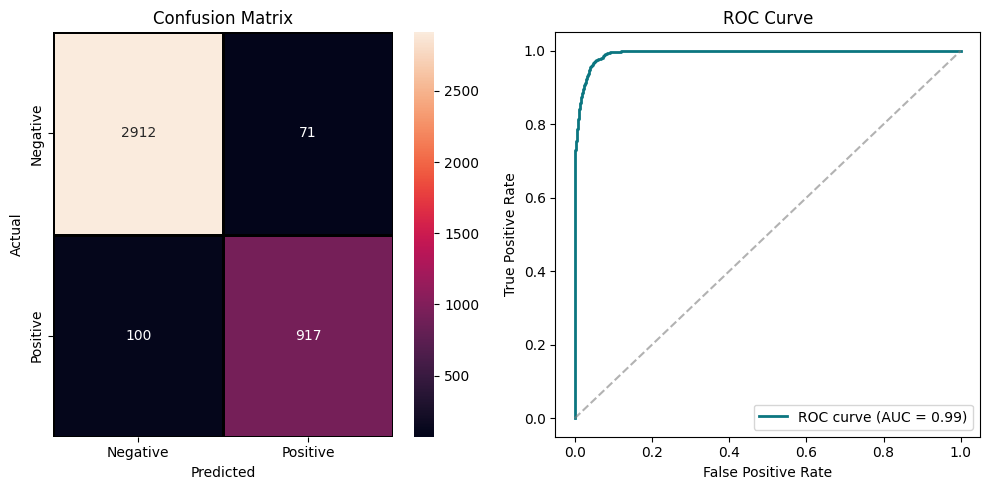

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_class_test, y_pred_log)
y_probs = logistic_model.predict_proba(X_test)[:, 1]  # Ймовірності для позитивного класу
fpr, tpr, _ = roc_curve(y_class_test, y_probs)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm, annot=True, fmt="d",linewidths=1, linecolor='black',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
sns.diverging_palette(145, 300, s=60, as_cmap=True)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

axes[1].plot(fpr, tpr, color='#0b7680', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.6)  # Лінія випадкового вгадування
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()


plt.tight_layout()
plt.show()


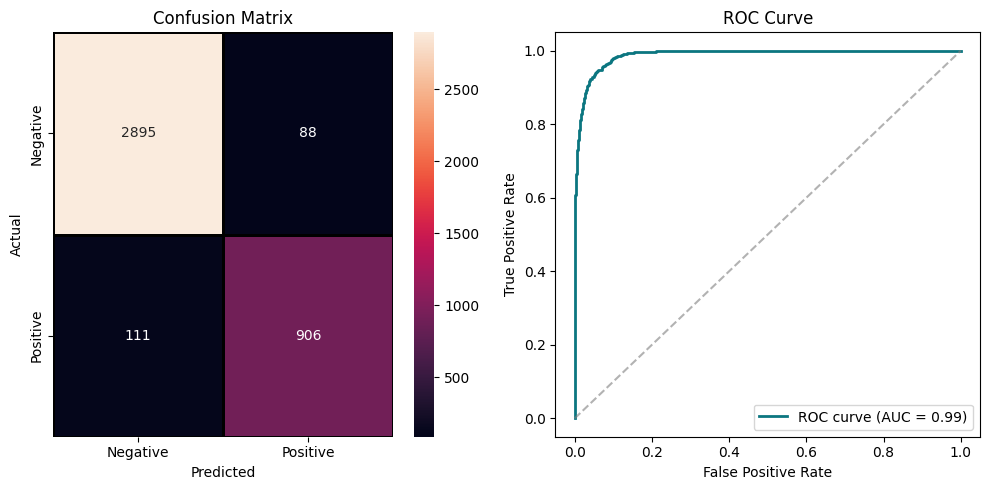

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_class_test, y_xgb_pred)
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Ймовірності для позитивного класу
fpr, tpr, _ = roc_curve(y_class_test, y_probs)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm, annot=True, fmt="d",linewidths=1, linecolor='black',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
sns.diverging_palette(145, 300, s=60, as_cmap=True)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

axes[1].plot(fpr, tpr, color='#0b7680', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.6)  # Лінія випадкового вгадування
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()


plt.tight_layout()
plt.show()
